# Load data

In [1]:
# Import necessary libraries
import pandas as pd

# Load the training dataset
train = pd.read_csv("Msc_Project_Data_With_Targets.csv")

# Load the test dataset
test = pd.read_csv("Msc_Project_Data_Without_Targets.csv")

# Display the training dataset
train

,Call_Type_Name,Low_Level_Segment6,Business_Requirement1,Business_Requirement2,Business_Requirement3,Business_Requirement4,Business_Requirement5,Low_Level_Segment1,Low_Level_Segment2,Low_Level_Segment3,Low_Level_Segment4,Low_Level_Segment5,Mid_Level_Key_Segment1,Mid_Level_Segment2,Mid_Level_Segment3,Mid_Level_Segment4,Mid_Level_Segment5,Mid_Level_Segment6,Legacy_Segment1,Legacy_Segment2
0,Category 1,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': False, 'item2': False, 'item3': 'Red'}",{'item1': False},"{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': True, 'item3': False...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': 'Poo...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': False, 'item3': False...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': 'Amber', 'item2': 'Red', 'item3': 'R..."
1,Category 4,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': False, 'item2': False, 'item3': 'Red'}",{'item1': False},"{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': False, 'item3': False...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': 'Poo...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': False, 'item3': True,...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': 'Green', 'item2': 'Red', 'item3': 'R..."
2,Category 7,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': 'Green'}",{'item1': True},"{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': False, 'item3': True,...","{'item1': True, 'item2': False, 'item3': True,...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': False, 'item3': 'Good...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': 'Amber', 'item2': 'Green', 'item3': ..."
3,Category 7,"{'item1': 'Red', 'item2': 'Green', 'item3': 'R...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': 'Green'}",{'item1': True},"{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': False, 'item2': False, 'item3': True...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': 'Good ...","{'item1': False, 'item2': True, 'item3': False...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': F

# Functions

In [2]:
# Function to convert string representations of dictionaries into an actual dictionaries
def convert_dict_columns(df):
    """
    Converts any string columns in the DataFrame that represent dictionaries into actual dictionaries.

    Parameters:
    - df: pandas DataFrame containing string representations of dictionaries.

    Returns:
    - df: DataFrame with converted dictionary columns.
    """
    for col in df.columns:
        try:
            df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
        except (ValueError, SyntaxError):
            pass  # Ignore columns that do not need conversion
    return df

In [3]:
# Function to flatten dictionary columns into individual columns
def flatten_dict_columns(df):
    """
    Flattens any dictionary columns into multiple columns.

    Parameters:
    - df: pandas DataFrame containing dictionary columns.

    Returns:
    - df: DataFrame with flattened dictionary columns.
    """
    new_cols = {}
    
    # Iterate through columns to check if they contain dictionaries
    for col in df.columns:
        if isinstance(df[col][0], dict):  # Perform check for containing dictionaries 
            expanded = df[col].apply(pd.Series).add_prefix(f"{col}_")
            new_cols[col] = expanded

    # Drop original dictionary columns and merge new expanded columns
    df = df.drop(columns=new_cols.keys(), axis=1)
    for col, expanded in new_cols.items():
        df = pd.concat([df, expanded], axis=1)
    
    return df

In [4]:
import pandas as pd

# Function to apply mappings to replace categorical variables with numeric values
def apply_mappings(df, mappings):
    """
    Replaces categorical values in a DataFrame using a provided mapping dictionary
    and converts the mapped columns to numeric where possible.

    Parameters:
    - df: pandas DataFrame to be transformed.
    - mappings: Dictionary containing mapping values for categorical columns.

    Returns:
    - df: DataFrame with categorical values replaced by numerical mappings.
    """
    # Apply the mappings to replace categorical values
    df = df.replace(mappings)

    # Convert all columns to numeric where possible
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='ignore')

    return df

In [5]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Function to evaluate a model using stratified k-fold cross-validation
def evaluate_model(model, X, y, n_splits=5, random_state=42):
    """
    Perform stratified k-fold cross-validation and return accuracy, recall, and F1 scores.

    Parameters:
    - model: The machine learning model to evaluate.
    - X: Features.
    - y: Target variable.
    - n_splits: Number of folds (default is 5).
    - random_state: Random seed for reproducibility.

    Returns:
    - scores_dict: Dictionary containing mean and standard deviation of accuracy, recall, and F1 score.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Compute cross-validation scores for accuracy, recall, and F1-score
    scoring_metrics = {
        "accuracy": "accuracy",
        "recall": "recall_macro",
        "f1_score": "f1_macro"
    }
    
    scores_dict = {}
    for metric_name, scoring in scoring_metrics.items():
        scores = cross_val_score(model, X, y, cv=skf, scoring=scoring)
        scores_dict[metric_name] = {
            "mean": scores.mean(),
            "std": scores.std(),
            "scores": scores
        }
        print(f"Cross-Validation {metric_name.capitalize()} Scores: {scores}")
        print(f"Mean {metric_name.capitalize()}: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}\n")



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, recall_score

# Function to plot class-wise recall learning curves
def plot_classwise_recall_learning_curve(model, X, y, class_labels, name):
    """
    Plots learning curves for recall of specific classes separately.

    Parameters:
    - model: Any scikit-learn classifier (e.g., RandomForestClassifier()).
    - X: Feature matrix.
    - y: Target labels.
    - class_labels: List of class labels to plot (e.g., [1, 2]).
    - name: Name of the model (for the title).

    Returns:
    - None (displays the learning curve plot showing training and validation recall for specified classes).
    """
    plt.figure(figsize=(8, 6))

    for class_label in class_labels:
        # Define class-specific recall scorer
        recall_scorer = make_scorer(lambda y_true, y_pred: recall_score(y_true, y_pred, average=None)[class_label])

        # Compute learning curve
        train_sizes, train_scores, val_scores = learning_curve(
            model, X, y, cv=5, scoring=recall_scorer, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
        )

        # Compute mean and standard deviation
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        # Plot learning curve for the class
        plt.plot(train_sizes, train_mean, 'o-', label=f"Training Recall - Class {class_label}")
        plt.plot(train_sizes, val_mean, 'o-', label=f"Validation Recall - Class {class_label}")

    # Labels and title
    plt.xlabel("Training Set Size")
    plt.ylabel("Recall Score")
    plt.title(f"Learning Curve (Recall for Classes {class_labels}) - {name}")
    plt.legend()
    plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot a general accuracy learning curve
def plot_accuracy_learning_curve(model, X, y, name):
    """
    Plots a learning curve for accuracy.

    Parameters:
    - model: Any scikit-learn classifier (e.g., RandomForestClassifier()).
    - X: Feature matrix.
    - y: Target labels.
    - name: Name of the model (for the title).

    Returns:
    - None (displays the accuracy learning curve plot).
    """
    
    # Compute learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    # Compute mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curve for accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy", color="blue")
    plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy", color="red")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="red")

    # Labels and title
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.title(f"Learning Curve (Accuracy) - {name}")
    plt.legend()
    plt.grid()
    plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Function to plot Precision-Recall curve for multi-class classification
def plot_precision_recall_curve(model, X_test, y_test):
    """
    Plots the Precision-Recall (PR) Curve for a multi-class classification model.

    Parameters:
    - model: Trained classifier with a `predict_proba` method.
    - X_test: Feature matrix of the test dataset.
    - y_test: True labels of the test dataset.

    Returns:
    - None (displays a PR curve plot)
    """
    # Convert y_test to one-hot encoding (multi-class format required for PR-AUC)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]  # Number of classes

    # Predict probabilities for each class
    y_prob = model.predict_proba(X_test)

    # Plot PR Curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        pr_auc = average_precision_score(y_test_bin[:, i], y_prob[:, i])
        
        plt.plot(recall, precision, label=f"Class {i} (AUC = {pr_auc:.2f})")

    # Final formatting
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve (Multi-Class)")
    plt.legend()
    plt.grid()
    plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, recall_score

# Helper function to create a recall scorer for a specific class
def class_recall_scorer(class_index):
    """
    Creates a custom recall scorer for a specific class.

    Parameters:
    - class_index: The index of the class for which the recall score is to be computed.

    Returns:
    - A callable scorer function that returns the recall score for the specified class.
    """
    def scorer(y_true, y_pred):
        recall_scores = recall_score(y_true, y_pred, average=None)
        if class_index < len(recall_scores):
            return recall_scores[class_index]
        else:
            return 0
    return make_scorer(scorer)

# Function to plot class-wise recall learning curve (alternative version)
def plot_classwise_recall_learning_curve_semi(model, X, y, class_labels, name):
    """
    Plots learning curves for recall of specific classes separately, using a custom recall scorer.

    Parameters:
    - model: Any scikit-learn classifier (e.g., RandomForestClassifier()).
    - X: Feature matrix.
    - y: Target labels.
    - class_labels: List of class labels to plot (e.g., [0, 1]).
    - name: Name of the model (for the title).

    Returns:
    - None (displays the learning curve plot showing training and validation recall for specified classes).
    """
    plt.figure(figsize=(8, 6))

    for class_label in class_labels:
        recall_scorer = class_recall_scorer(class_label)  # Use function instead of lambda

        train_sizes, train_scores, val_scores = learning_curve(
            model, X, y, cv=5, scoring=recall_scorer, train_sizes=np.linspace(0.3, 1.0, 5), n_jobs=-1
        )

        # Compute mean and standard deviation
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        # Plot learning curve for the class
        plt.plot(train_sizes, train_mean, 'o-', label=f"Training Recall - Class {class_label}")
        plt.plot(train_sizes, val_mean, 'o-', label=f"Validation Recall - Class {class_label}")

    # Labels and title
    plt.xlabel("Training Set Size")
    plt.ylabel("Recall Score")
    plt.title(f"Learning Curve (Recall for Classes {class_labels}) - {name}")
    plt.legend()
    plt.grid()
    plt.show()  # Ensure the plot is displayed

# Data inspection

In [10]:
# Display information about the DataFrame such as data types, non-null counts, and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Call_Type_Name          400 non-null    object
 1   Low_Level_Segment6      400 non-null    object
 2   Business_Requirement1   400 non-null    object
 3   Business_Requirement2   400 non-null    object
 4   Business_Requirement3   400 non-null    object
 5   Business_Requirement4   400 non-null    object
 6   Business_Requirement5   400 non-null    object
 7   Low_Level_Segment1      400 non-null    object
 8   Low_Level_Segment2      400 non-null    object
 9   Low_Level_Segment3      400 non-null    object
 10  Low_Level_Segment4      400 non-null    object
 11  Low_Level_Segment5      400 non-null    object
 12  Mid_Level_Key_Segment1  400 non-null    object
 13  Mid_Level_Segment2      400 non-null    object
 14  Mid_Level_Segment3      400 non-null    object
 15  Mid_Le

In [11]:
# Generate descriptive statistics (mean, standard deviation, etc.) for numerical columns
train.describe()

,Call_Type_Name,Low_Level_Segment6,Business_Requirement1,Business_Requirement2,Business_Requirement3,Business_Requirement4,Business_Requirement5,Low_Level_Segment1,Low_Level_Segment2,Low_Level_Segment3,Low_Level_Segment4,Low_Level_Segment5,Mid_Level_Key_Segment1,Mid_Level_Segment2,Mid_Level_Segment3,Mid_Level_Segment4,Mid_Level_Segment5,Mid_Level_Segment6,Legacy_Segment1,Legacy_Segment2
count,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400
unique,7,22,35,4,2,6,4,47,14,30,23,28,4,26,54,14,47,5,245,61
top,Category 7,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': False, 'item2': False, 'item3': 'Red'}",{'item1': True},"{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': False, 'item3': True,...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': 'Good ...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': 'Green', 'item2': 'Green', 'item3': ..."
freq,281,157,171,196,227,283,260,78,90,61,125,84,187,270,305,355,274,300,18,103


In [12]:
# Check for duplicate rows in the dataset
duplicate_count = train.duplicated().sum() # Count the number of duplicate rows
print("\nNumber of duplicate rows:", duplicate_count)

# Display all rows that are duplicates (with all columns visible)
duplicates = train[train.duplicated(keep=False)]

# Remove duplicate rows, keeping only the first occurrence of each duplicate
train = train.drop_duplicates()

# Display the new shape of the dataframe after removing duplicates to confirm removal
print("\nDataFrame after dropping duplicates:")
print("New shape:", train.shape)


Number of duplicate rows: 5

DataFrame after dropping duplicates:
New shape: (395, 20)


In [13]:
# Check for missing values in each column
print("\n=== Missing Values per Column ===")
print(train.isnull().sum())


=== Missing Values per Column ===
Call_Type_Name            0
Low_Level_Segment6        0
Business_Requirement1     0
Business_Requirement2     0
Business_Requirement3     0
Business_Requirement4     0
Business_Requirement5     0
Low_Level_Segment1        0
Low_Level_Segment2        0
Low_Level_Segment3        0
Low_Level_Segment4        0
Low_Level_Segment5        0
Mid_Level_Key_Segment1    0
Mid_Level_Segment2        0
Mid_Level_Segment3        0
Mid_Level_Segment4        0
Mid_Level_Segment5        0
Mid_Level_Segment6        0
Legacy_Segment1           0
Legacy_Segment2           0
dtype: int64


In [14]:
# Check the distribution of the values in the "Call_Type_Name" column
train["Call_Type_Name"].value_counts()

Category 7    281
Category 6     59
Category 1     24
Category 3     16
Category 5      8
Category 2      6
Category 4      1
Name: Call_Type_Name, dtype: int64

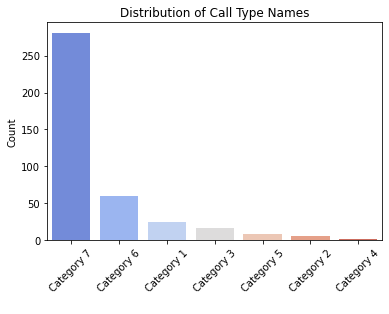

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualise the distribution of "Call_Type_Name" using a bar plot
sns.barplot(x=train["Call_Type_Name"].value_counts().index, 
            y=train["Call_Type_Name"].value_counts().values, 
            palette="coolwarm")

# Labels and title and display
plt.xlabel(" ")
plt.ylabel("Count")
plt.title("Distribution of Call Type Names")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


# Data preprocessing and exploration

In [16]:
# Import necessary libraries
import ast
import matplotlib.pyplot as plt

# Convert dictionary-like string columns to actual dictionaries in the train and test datasets
train = convert_dict_columns(train)  # Apply the conversion to the training dataset
test = convert_dict_columns(test)    # Apply the conversion to the test dataset
train.head()  # Display the first few rows of the transformed training dataset for inspection

<ipython-input-2-14d0c76881e8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


,Call_Type_Name,Low_Level_Segment6,Business_Requirement1,Business_Requirement2,Business_Requirement3,Business_Requirement4,Business_Requirement5,Low_Level_Segment1,Low_Level_Segment2,Low_Level_Segment3,Low_Level_Segment4,Low_Level_Segment5,Mid_Level_Key_Segment1,Mid_Level_Segment2,Mid_Level_Segment3,Mid_Level_Segment4,Mid_Level_Segment5,Mid_Level_Segment6,Legacy_Segment1,Legacy_Segment2
0,Category 1,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': False, 'item2': False, 'item3': 'Red'}",{'item1': False},"{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': True, 'item3': False...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': 'Poo...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': False, 'item3': False...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': 'Amber', 'item2': 'Red', 'item3': 'R..."
1,Category 4,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': False, 'item2': False, 'item3': 'Red'}",{'item1': False},"{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': False, 'item3': False...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': 'Poo...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': False, 'item3': True,...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': 'Green', 'item2': 'Red', 'item3': 'R..."
2,Category 7,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': 'Green'}",{'item1': True},"{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': False, 'item3': True,...","{'item1': True, 'item2': False, 'item3': True,...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': False, 'item3': 'Good...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': 'Amber', 'item2': 'Green', 'item3': ..."
3,Category 7,"{'item1': 'Red', 'item2': 'Green', 'item3': 'R...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': 'Green'}",{'item1': True},"{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': False, 'item2': False, 'item3': True...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': True, 'item2': True, 'item3': 'Good ...","{'item1': False, 'item2': True, 'item3': False...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': F

In [17]:
# Flatten the dictionary-based columns to individual columns (expanding nested dictionaries)
train = flatten_dict_columns(train)  # Flatten the train dataset
test = flatten_dict_columns(test)    # Flatten the test dataset

# View the transformed dataset to inspect the changes
train

,Call_Type_Name,Low_Level_Segment6_item1,Low_Level_Segment6_item2,Low_Level_Segment6_item3,Low_Level_Segment6_item4,Low_Level_Segment6_item5,Low_Level_Segment6_item6,Business_Requirement1_item1,Business_Requirement1_item2,Business_Requirement1_item3,...,Legacy_Segment1_item28,Legacy_Segment2_item1,Legacy_Segment2_item2,Legacy_Segment2_item3,Legacy_Segment2_item4,Legacy_Segment2_item5,Legacy_Segment2_item6,Legacy_Segment2_item7,Legacy_Segment2_item8,Legacy_Segment2_item9
0,Category 1,Red,Red,Red,Red,Red,uncategorized,True,True,True,...,False,Amber,Red,Red,Red,False,True,True,True,False
1,Category 4,Red,Red,Red,Red,Red,uncategorized,True,True,True,...,False,Green,Red,Red,Red,False,False,False,False,False
2,Category 7,Red,Red,Red,Green,Red,initial_call,True,True,True,...,True,Amber,Green,Green,Green,True,True,True,True,True
3,Category 7,Red,Green,Red,Green,Red,initial_call,True,True,True,...,True,Green,Green,Green,Green,True,True,True,True,True
4,Category 7,Red,Red,Green,Green,Red,initial_call,True,True,True,...,False,Green,Green,Green,Green,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Category 7,Red,Red,Red,Red,Red,uncategorized,False,False,False,...,False,Red,Green,Red,Green,True,True,True,True,True
396,Category 7,Red,Red,Red,Green,Red,initial_call,False,False,False,...,True,Red,Green,Red,Green,True,True,True,True,True
397,Category 7,Red,Red,Red,Green,Red,initial_call,True,True,True,...,False,Green,Green,Green,Green,True,True,True,True,True
398,Category 6,Green,Green,Green,Red,Red,add_ons_call,False,False,True,...,True,Red,Red,Red,Red,False,True,True,True,True


In [18]:
import pandas as pd

# Mapping for color values (Red, Amber, Green)
color_mapping = {"Red": 0, "Amber": 1, "Green": 2}

# Boolean mapping (True/False to 1/0)
boolean_mapping = {False: 0, True: 1}

# Mapping for different call types
call_mapping = {"uncategorized": 0, "initial_call": 1, "add_ons_call": 2, "validation_call": 3}

# Mapping for different outcomes (e.g., Poor Outcome, Good Outcome)
outcome_mapping = {"Poor Outcome": 0, "Good Outcome with Development": 1, "Good Outcome": 2}

# Mapping for different categories (Category 1-7)
type_mapping = {"Category 1": 0, "Category 2": 0, "Category 3": 0, "Category 4": 0, "Category 5": 0, "Category 6": 1, "Category 7": 2}

# Combine all mappings into one composite mapping dictionary
composite_mapping = {**color_mapping, **boolean_mapping, **call_mapping, **outcome_mapping, **type_mapping}

In [19]:
# Apply the composite mapping to the training dataset
train = apply_mappings(train, composite_mapping)  # Transform the training dataset

# View the mapped training dataset
train

,Call_Type_Name,Low_Level_Segment6_item1,Low_Level_Segment6_item2,Low_Level_Segment6_item3,Low_Level_Segment6_item4,Low_Level_Segment6_item5,Low_Level_Segment6_item6,Business_Requirement1_item1,Business_Requirement1_item2,Business_Requirement1_item3,...,Legacy_Segment1_item28,Legacy_Segment2_item1,Legacy_Segment2_item2,Legacy_Segment2_item3,Legacy_Segment2_item4,Legacy_Segment2_item5,Legacy_Segment2_item6,Legacy_Segment2_item7,Legacy_Segment2_item8,Legacy_Segment2_item9
0,0,0,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,1,1,1,0
1,0,0,0,0,0,0,0,1,1,1,...,0,2,0,0,0,0,0,0,0,0
2,2,0,0,0,2,0,1,1,1,1,...,1,1,2,2,2,1,1,1,1,1
3,2,0,2,0,2,0,1,1,1,1,...,1,2,2,2,2,1,1,1,1,1
4,2,0,0,2,2,0,1,1,1,1,...,0,2,2,2,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2,0,0,0,0,0,0,0,0,0,...,0,0,2,0,2,1,1,1,1,1
396,2,0,0,0,2,0,1,0,0,0,...,1,0,2,0,2,1,1,1,1,1
397,2,0,0,0,2,0,1,1,1,1,...,0,2,2,2,2,1,1,1,1,1
398,1,2,2,2,0,0,2,0,0,1,...,1,0,0,0,0,0,1,1,1,1


In [20]:
# Apply the composite mapping to the test dataset
test = apply_mappings(test, composite_mapping)  # Transform the test dataset

# View the mapped test dataset
test

,Low_Level_Segment6_item1,Low_Level_Segment6_item2,Low_Level_Segment6_item3,Low_Level_Segment6_item4,Low_Level_Segment6_item5,Low_Level_Segment6_item6,Business_Requirement1_item1,Business_Requirement1_item2,Business_Requirement1_item3,Business_Requirement1_item4,...,Legacy_Segment1_item28,Legacy_Segment2_item1,Legacy_Segment2_item2,Legacy_Segment2_item3,Legacy_Segment2_item4,Legacy_Segment2_item5,Legacy_Segment2_item6,Legacy_Segment2_item7,Legacy_Segment2_item8,Legacy_Segment2_item9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,...,0,2,0,2,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2888,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2889,0,2,0,0,0,2,0,0,0,0,...,0,1,2,0,2,1,1,1,1,1


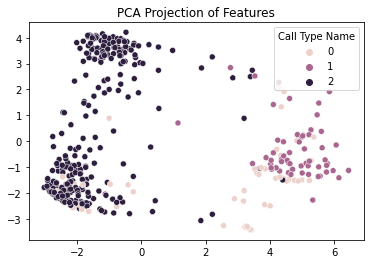

In [21]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA (Principal Component Analysis) to reduce the feature space to 2 components for better visualisation
pca = PCA(n_components=2) # Specify the number of components to reduce to (2 for 2D plot)
X_pca = pca.fit_transform(train.drop(columns=["Call_Type_Name"]))  # Drop the target column for PCA

# Create a scatter plot to visualise the 2D projection of the features
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=train["Call_Type_Name"])
plt.legend(title="Call Type Name", loc="upper right") # Move legend to the top-right
plt.title("PCA Projection of Features")
plt.show()


# Standard model - random forest

In [22]:
# Split the features (X) and the target variable (y)
X = train.iloc[:,1:]  # Features: All columns except the first (target column)
y = train['Call_Type_Name'] # Target variable: 'Call_Type_Name' column

In [23]:
# Import necessary libraries for model building and evaluation
import numpy as np
from sklearn.ensemble import RandomForestClassifier   # Random Forest model
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.metrics import accuracy_score            # For accuracy calculation
from sklearn.model_selection import GridSearchCV      # For hyperparameter tuning

# Split the dataset into training and testing subsets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the hyperparameter grid to search over during cross-validation
param_grid = {
    'n_estimators': [50, 100],     # Number of trees in the forest; trying smaller numbers for speed
    'max_depth': [5, 10],          # Maximum depth of the trees; limiting depth to avoid overfitting
    'min_samples_split': [5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3],    # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced']   # Automatically adjust weights for imbalanced classes
}

# Instantiate the RandomForestClassifier 
rd = RandomForestClassifier(random_state=42,class_weight='balanced')

# Initialise GridSearchCV to perform a hyperparameter search with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=rd, 
    param_grid=param_grid, 
    scoring='recall_macro',  # Focus on maximising recall across all classes
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1,               # Use all available CPUs
    verbose=1                # Show progress while fitting the model
)

# Perform hyperparameter tuning using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best combination of hyperparameters and the best recall score found during grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best hyperparameters and recall score
best_params, best_score

Fitting 5 folds for each of 16 candidates, totalling 80 fits


({'class_weight': 'balanced',
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 50},
 0.9277777777777778)

In [24]:
# Retrieve the best model from GridSearchCV
best_rd = grid_search.best_estimator_  

# Use the best model to make predictions on the test set
y_pred = best_rd.predict(X_test) 

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Output a classification report showing precision, recall, f1-score for each class
print("Classification Report (Test):\n", classification_report(y_test, y_pred))

Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       1.00      0.92      0.96        12
           2       0.93      1.00      0.97        56

    accuracy                           0.95        79
   macro avg       0.98      0.88      0.92        79
weighted avg       0.95      0.95      0.95        79



In [26]:
# Call previously defined function to evaluate the model on accuracy, recall, and F1 score
evaluate_model(best_rd, X, y, n_splits=5, random_state=42)

Cross-Validation Accuracy Scores: [0.98734177 0.94936709 0.97468354 0.96202532 0.89873418]
Mean Accuracy: 0.9544, Standard Deviation: 0.0306

Cross-Validation Recall Scores: [0.96969697 0.87878788 0.93939394 0.91161616 0.83315296]
Mean Recall: 0.9065, Standard Deviation: 0.0474

Cross-Validation F1_score Scores: [0.96963423 0.89443695 0.96081871 0.94347826 0.85100432]
Mean F1_score: 0.9239, Standard Deviation: 0.0448



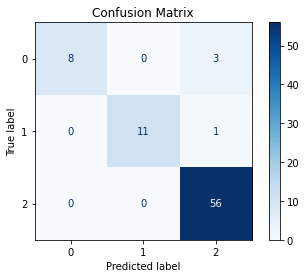

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix for the predictions
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap for better readability
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

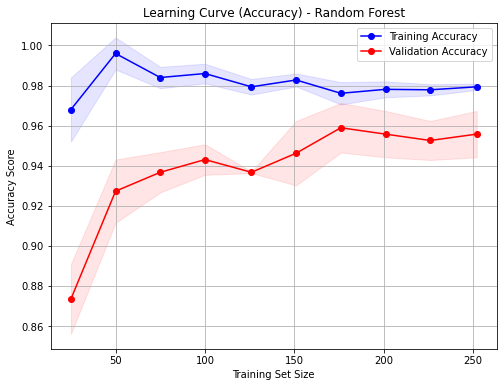

In [28]:
# Plot the accuracy learning curve for the Random Forest model
plot_accuracy_learning_curve(best_rd, X_train, y_train, "Random Forest")

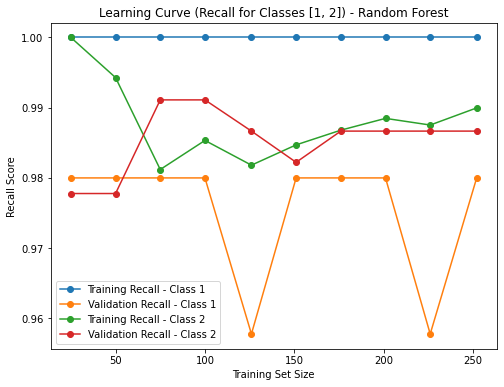

In [29]:
# Plot class-wise recall learning curve for category 6 (class 1) and category 7 (class 2)
plot_classwise_recall_learning_curve(best_rd, X_train, y_train, [1, 2], "Random Forest")

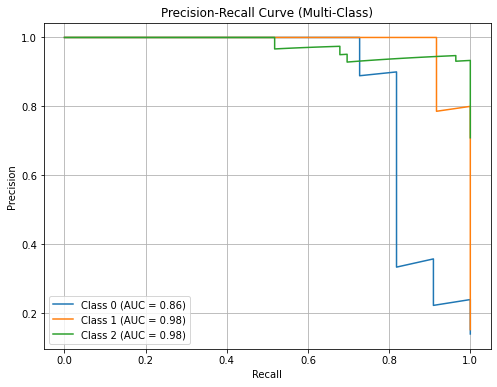

In [30]:
# Plot the Precision-Recall curve for the model on the test set
plot_precision_recall_curve(best_rd, X_test, y_test)

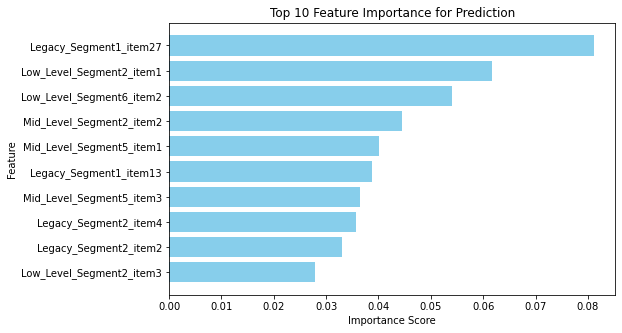

In [31]:
# Extract the feature importances from the trained Random Forest model
feature_importance = best_rd.feature_importances_
features = X_train.columns  # Feature names

# Create a DataFrame to store and sort features by importance
df_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by="Importance", ascending=False)

# Limit to the top 10 most important features for better visualisation
df_importance_top10 = df_importance.head(10)

# Plot feature importance for Model (Top 10 Features)
plt.figure(figsize=(8, 5))
plt.barh(df_importance_top10['Feature'], df_importance_top10['Importance'], color= "skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance for Prediction")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

In [32]:
# Load the unlabelled test data for prediction (not containing target labels)
temp = pd.DataFrame(pd.read_csv("Msc_Project_Data_Without_Targets.csv"))

# Use the best Random Forest model to predict the 'Call_Type_Name' for the unlabelled data
temp['Call_Type_Name'] = [int(x) for x in best_rd.predict(test)]

# Save the predictions to a new CSV file for further use
temp.to_csv("randomforest.csv", index=False)

# Display the distribution of the predicted 'Call_Type_Name' values in the unlabelled data
temp['Call_Type_Name'].value_counts() 

0    2304
2     537
1      50
Name: Call_Type_Name, dtype: int64

# Advanced Model - autoencoder with logistic regression

In [33]:
# Import necessary libraries for the advanced model (autoencoder + logistic regression)
import numpy as np
import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV


# Set random seed to ensure reproducibility of the results
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Ensure that TensorFlow operations are deterministic
tf.config.experimental.enable_op_determinism()

# Separate features (X) and labels (y) for the labeled data
X_labeled = train.drop(["Call_Type_Name"], axis=1) # Drop the target column
X_unlabeled = test                                 # Use the entire 'test' dataset for unsupervised learning
X_combined = np.vstack((X_labeled, X_unlabeled))   # Combine labeled and unlabeled data for autoencoder
y_labeled = train["Call_Type_Name"]                # Store the target values for labeled data

# Split the labeled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_labeled, y_labeled, test_size=0.2, random_state=seed_value, stratify=y_labeled
)

# Set input dimension and encoding dimension
input_dim = X_combined.shape[1]  # Number of features in the combined dataset
encoding_dim = input_dim // 4  # Latent space dimension 

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation="relu")(input_layer)
encoded = Dense(64, activation="relu")(encoded)
encoded = Dense(encoding_dim, activation="relu")(encoded)  # Latent space

decoded = Dense(64, activation="relu")(encoded)
decoded = Dense(128, activation="relu")(decoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)  # Output layer (reconstruction)

# Build the autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse") # Mean squared error loss for reconstruction

# Train the autoencoder
autoencoder.fit(X_combined, X_combined, epochs=20, batch_size=64, shuffle=True, validation_data=(X_val, X_val))

# Extract the encoder part of the autoencoder (used for feature extraction)
encoder_model = Model(input_layer, encoded)


# Use the encoder model to encode the training and validation data
X_train_encoded = encoder_model.predict(X_train)
X_val_encoded = encoder_model.predict(X_val)

# Standardise the encoded features (important for training classifiers)
scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_val_encoded = scaler.transform(X_val_encoded)


# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularisation strength
    'solver': ['lbfgs', 'saga'],           # Optimisation algorithms
    'multi_class': ['multinomial', 'ovr']  # Multiclass strategies
}

# Initialize Logistic Regression classifier
clf = LogisticRegression(max_iter=500, random_state=seed_value)

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='recall_macro',  # Focus on maximizing recall across all classes
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1,               # Use all available CPUs for parallel computation
    verbose=1                # Show progress
)

# Perform Grid Search with cross-validation
grid_search.fit(X_train_encoded, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict using the best model on validation data
pred_y = best_model.predict(X_val_encoded)

# Print classification report (precision, recall, f1-score)
print(f"Best Parameters: {grid_search.best_params_}")
print(classification_report(y_val, pred_y))

Epoch 1/20
52/52 [==============================] - 2s 10ms/step - loss: 0.1921 - val_loss: 0.2019
Epoch 2/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0808 - val_loss: 0.1670
Epoch 3/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0681 - val_loss: 0.1600
Epoch 4/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0641 - val_loss: 0.1506
Epoch 5/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0594 - val_loss: 0.1388
Epoch 6/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0555 - val_loss: 0.1342
Epoch 7/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0536 - val_loss: 0.1298
Epoch 8/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0516 - val_loss: 0.1244
Epoch 9/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0497 - val_loss: 0.1239
Epoch 10/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0485 - val_loss: 0.1188
Epoch 11/20
52/52 

In [34]:
# Cross-validation recall score on the combined encoded train and validation sets
X_labeled_encoded = np.vstack((X_train_encoded, X_val_encoded))
y_labeled_encoded = np.concatenate((y_train, y_val))
evaluate_model(best_model, X_labeled_encoded, y_labeled_encoded, n_splits=5, random_state=42)

Cross-Validation Accuracy Scores: [0.92405063 0.97468354 0.93670886 0.97468354 0.96202532]
Mean Accuracy: 0.9544, Standard Deviation: 0.0206

Cross-Validation Recall Scores: [0.86688312 0.98809524 0.89718615 0.93939394 0.90909091]
Mean Recall: 0.9201, Standard Deviation: 0.0412

Cross-Validation F1_score Scores: [0.88140351 0.96616162 0.89539683 0.96081871 0.92028986]
Mean F1_score: 0.9248, Standard Deviation: 0.0340



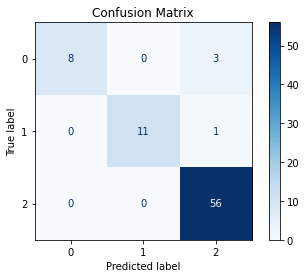

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix and display it as a heatmap
cm = confusion_matrix(y_val, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

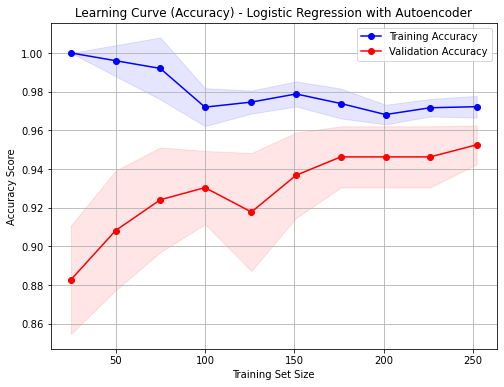

In [36]:
# Plot the accuracy learning curve for the Logistic Regression model
plot_accuracy_learning_curve(best_model, X_train_encoded, y_train, "Logistic Regression with Autoencoder")

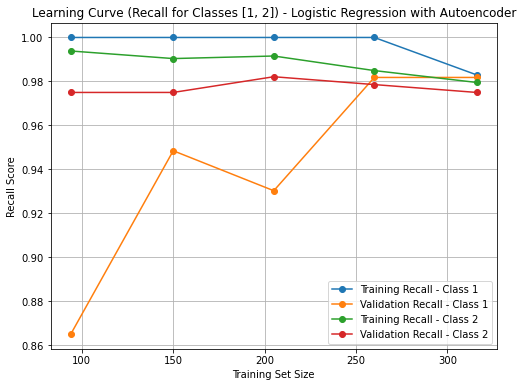

In [37]:
# Plot class-wise recall learning curve for categories 1 and 2
plot_classwise_recall_learning_curve_semi(model=best_model,       
    X=X_labeled_encoded,      # The transformed feature set
    y=y_labeled_encoded,      # The corresponding target labels
    class_labels=[1,2],   
    name="Logistic Regression with Autoencoder")

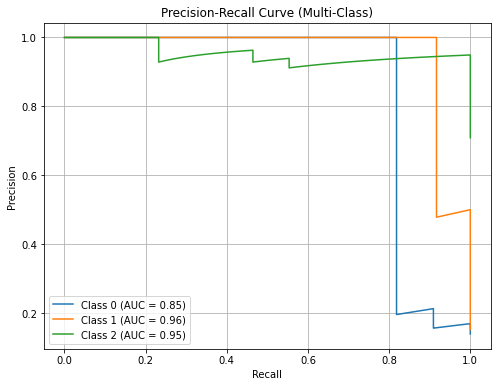

In [38]:
# Plot Precision-Recall curve for the Logistic Regression model
plot_precision_recall_curve(best_model, X_val_encoded, y_val)

In [39]:
# Encode the unlabeled data using the trained autoencoder
X_unlabeled_encoded = encoder_model.predict(X_unlabeled)

# Standardise the encoded features for the unlabeled data
X_unlabeled_encoded = scaler.transform(X_unlabeled_encoded)

# Make predictions on the unlabeled data using the trained classifier
predictions = best_model.predict(X_unlabeled_encoded)

# Load temporary dataset to add predictions as a new column
temp = pd.DataFrame(pd.read_csv("Msc_Project_Data_Without_Targets.csv"))
temp["Call_Type_Name"] = predictions 

# Save predictions to a CSV file
temp.to_csv("autoencoder.csv", index=False)

# Display the distribution of predicted class labels
temp['Call_Type_Name'].value_counts() 

91/91 [==============================] - 0s 2ms/step


0    2157
2     686
1      48
Name: Call_Type_Name, dtype: int64